# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project: Finding Donors for *CharityML*

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is **to construct a model that accurately predicts whether an individual makes more than $50,000**. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [32]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns
import matplotlib.pyplot as plt


# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
data.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [33]:
# Get more deep into the data
data.shape

(45222, 14)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

#### We can conclude that we have 45222 data points with 14 non-null features

In [35]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [36]:
data.income.value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [37]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k,n_greater_50k = data.income.value_counts()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)* 100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.4f}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.7844%


----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

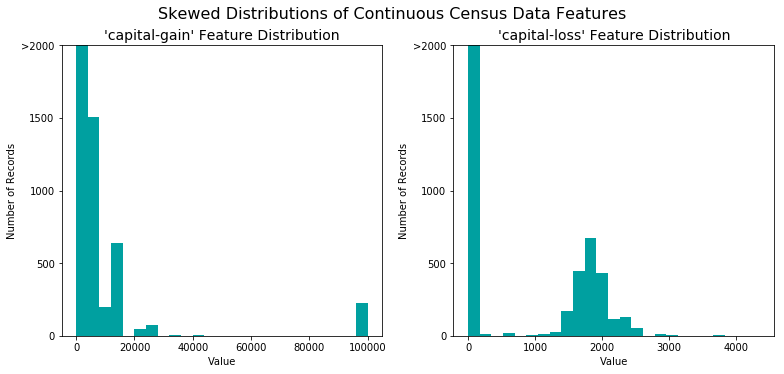

In [38]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

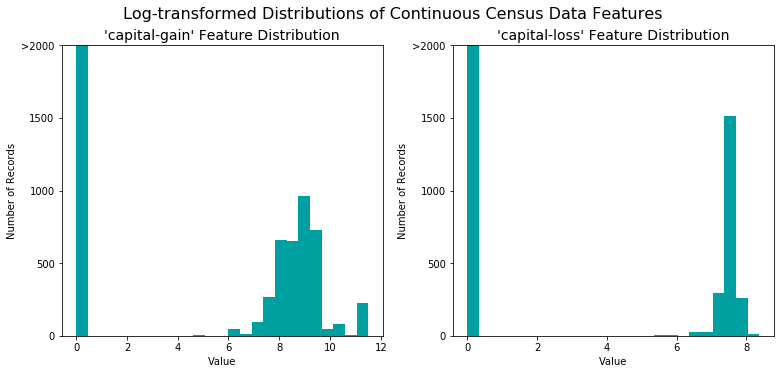

In [39]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [40]:
# re-assign the new values from features_log_transofrmed into features_raw 
features_raw[skewed] = features_log_transformed
features_raw.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,7.684784,0.0,40.0,United-States
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,13.0,United-States
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,40.0,United-States
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,40.0,United-States
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,40.0,Cuba


#### This is the shape of distribuation before applying `MinMaxScaler`

/Users/dodo/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


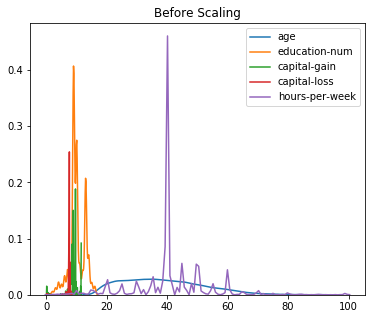

In [41]:
fig, ax1 = plt.subplots(ncols=1, figsize=(6, 5))

ax1.set_title('Before Scaling')

sns.kdeplot(features_raw['age'], ax=ax1)
sns.kdeplot(features_raw['education-num'], ax=ax1)
sns.kdeplot(features_raw['capital-gain'], ax=ax1)
sns.kdeplot(features_raw['capital-loss'], ax=ax1)
sns.kdeplot(features_raw['hours-per-week'], ax=ax1)

### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [42]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Change the data type of ourr numerical columns to float in order to do the transform
features_raw.apply(pd.to_numeric, errors='ignore')

# Do the transformation
features_log_minmax_transform = pd.DataFrame(data = features_raw)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


#### This shape is after applying `MinMaxScaler` that its fundemental use is to shrink the range such that the range is now between 0 and 1

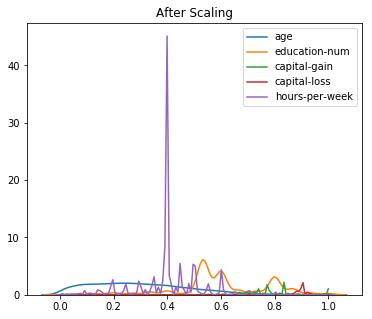

In [43]:
fig, ax2 = plt.subplots(ncols=1, figsize=(6, 5))

ax2.set_title('After Scaling')

sns.kdeplot(features_log_minmax_transform['age'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['education-num'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['capital-gain'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['capital-loss'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['hours-per-week'], ax=ax2)

#### This shape shows the before and after scalings besides.

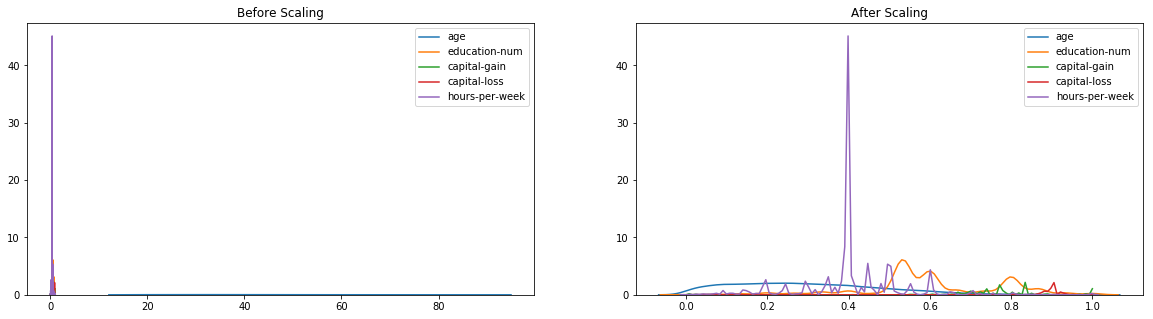

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 5))

ax1.set_title('Before Scaling')

sns.kdeplot(features_raw['age'], ax=ax1)
sns.kdeplot(features_raw['education-num'], ax=ax1)
sns.kdeplot(features_raw['capital-gain'], ax=ax1)
sns.kdeplot(features_raw['capital-loss'], ax=ax1)
sns.kdeplot(features_raw['hours-per-week'], ax=ax1)

ax2.set_title('After Scaling')

sns.kdeplot(features_log_minmax_transform['age'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['education-num'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['capital-gain'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['capital-loss'], ax=ax2)
sns.kdeplot(features_log_minmax_transform['hours-per-week'], ax=ax2)

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`. We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [45]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform) 

# Encode the 'income_raw' data to numerical values
income = pd.get_dummies(income_raw)

# Since we have k possible values for categorial values, we can represent it in k-1 values.
income.drop(income.columns[0],axis=1, inplace=True)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

103 total features after one-hot encoding.


In [46]:
income.head()

,>50K
0,0
1,0
2,0
3,0
4,0


In [47]:
# These are the resulted columns from one hot encoding
print(encoded)

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', '

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [48]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Dataset has {} records".format(n_records))
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Dataset has 45222 records
Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most $50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

** Accuracy ** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

** Precision ** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

** Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

**Please note** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision(True Positives/(True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score(True Positives/(True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [49]:
# Those people who have income more than >50k.
TP = (np.sum(income))[0]

# Those people who have income <=50k and considered as misclassified since our model always predicts 1
FP = (income.count())[0] - TP

# No predicted negatives in the naive case
TN = 0

# No predicted negatives in the naive case
FN = 0 

# TODO: Calculate accuracy, precision and recall

accuracy = TP/(TP+FP+TN+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta = 0.5
beta_squared = beta**2
fscore = (1+beta_squared)*((precision*recall)/((beta_squared*precision)+recall))

print("Accuracy: {:.4f}".format(accuracy))
print("Reccall: {:.4f}".format(recall))
print("Precision: {:.4f}".format(precision))
print("F-score: {:.4f}".format(fscore))

Accuracy: 0.2478
Reccall: 1.0000
Precision: 0.2478
F-score: 0.2917


In [50]:
# Print the results for Naive Predictor  
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer: **
- **Decision Tree** :
    - Real-World applciation:
        - Finding Alternatives
            - Decision trees help organisations to view alternatives to different events that can happen. For example, an organisation is planning to build a new product. A lot of resources and money will be invested in it. Decision trees will help the organisation to have a look at all other alternatives if they do not want to build the product from scratch. Alternatives may include not building the new product at all or bringing modifications to existing products to incorporate new features in them
    - Strength : 
        - Easy to interpret and explain.
        - Non-parametric function so it won't be affected by outliers.
        - Fast and accurate.
    - Weakness:
        - Easily overfit.
        - It doesn't preform well with large number of features 
    - Our dataset has few number of features that make it less likely to overefit and this method is ease to understand.

- **SVM** :
    - Real-World application:
        - Text Classification, Image recoginition, and Character recognition:
            - Because in all of them, SVM can capture the complex relationships between the pata 
    - Strength:
        - Can model complex, nonlinear relationships.
        - Robust to noise(because they maximize margins).
        - Effective in high dimensional spaces since it has we can specifiy [custom kernels](https://scikit-learn.org/stable/modules/svm.html) to split our data.
    - Weakness:
        - Slow so it needs a significant memory and processing power.
        - If the number of features are much greater than the number of training samples it will result in overfitting problem.
    - For our classification problem will not be [linearly separable](https://stackoverflow.com/questions/13976565/neural-networks-what-does-linearly-separable-mean); So, SVM will be working so good using kernel.
    
- **Random Forest** :
    - Real-World application:
        - Almost any machine learning problem.
    - Strength:
        - Good for parllel or distributed computing.
        - Gives a good idea of which features in data are the most important.
        - Very high predictive accuracy in addition to  easily explained the algorthim to others.
    - Weakness:
        - Only predicts well with a good punch of data.
        - Biased in multiclass problems toward more frequent classes.
        - Badly prefomed with un-balanced data.
        - [Huge computational power ](https://www.quora.com/What-are-the-disadvantages-of-a-random-forest-algorithm)
    - Our data is well balaced, binary class, and has enough data points to trainning random forest well.
    
    
**References:**:
- [Algorithms (Pros and cons)](https://www.hackingnote.com/en/machine-learning/algorithms-pros-and-cons)
- [Comparring supervised learning algorithm](https://www.dataschool.io/comparing-supervised-learning-algorithms/)

### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, **it's important that you create a training and predicting pipeline** that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [51]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, fbeta_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner.fit(X_train[:sample_size],y_train[:sample_size].values.ravel())
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end-start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end -start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train[:300])
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    acc = accuracy_score(y_test,predictions_test)
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train[:300],beta=0.5)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
    f = fbeta_score(y_test,predictions_test,beta=0.5)   
    # Success
    print("{} trained on {} samples has training time: {:.2f} while testing time {:.2f}".format(learner.__class__.__name__, sample_size,results['train_time'],results['pred_time']))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [52]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


# TODO: Initialize the three models
clf_A = DecisionTreeClassifier(random_state=0)
clf_B = SVC(random_state=0)
clf_C = RandomForestClassifier(random_state=0)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(samples_100*0.1)
samples_1 = int(samples_100*0.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)
        if(samples == samples_100):
            print("F_SCORE on all training data is {:.4f}%".format(100*results[clf_name][i].get('f_train')))

DecisionTreeClassifier trained on 361 samples has training time: 0.00 while testing time 0.00
DecisionTreeClassifier trained on 3617 samples has training time: 0.03 while testing time 0.00
DecisionTreeClassifier trained on 36177 samples has training time: 0.44 while testing time 0.01
F_SCORE on all training data is 96.3855%


/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


SVC trained on 361 samples has training time: 0.01 while testing time 0.23
SVC trained on 3617 samples has training time: 0.92 while testing time 1.89
SVC trained on 36177 samples has training time: 108.61 while testing time 17.18
F_SCORE on all training data is 71.9697%
RandomForestClassifier trained on 361 samples has training time: 0.01 while testing time 0.01
RandomForestClassifier trained on 3617 samples has training time: 0.04 while testing time 0.02
RandomForestClassifier trained on 36177 samples has training time: 0.60 while testing time 0.03
F_SCORE on all training data is 93.3735%


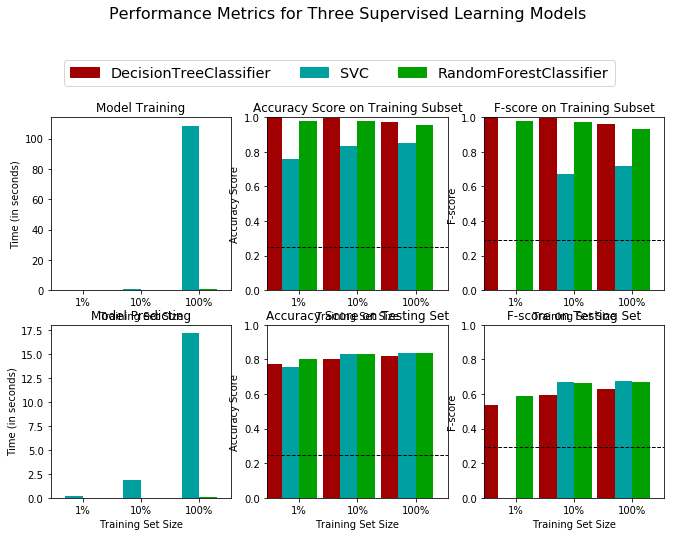

In [53]:
# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results,accuracy,fscore)


#### Which model has the highest f1 socre

In [54]:
pred_time_SVC = results.get("SVC")[2]['pred_time'] 
pred_time_RF = results.get("RandomForestClassifier")[2]['pred_time']
f1_SVC = results.get("SVC")[2]['f_test']*100
f1_RF = results.get("RandomForestClassifier")[2]['f_test']*100

sample = X_test.shape[0]

print('SVC trained on {} samples has testing time: {:.3f} seconds while f1 score {:.2f}%'.format(sample,pred_time_SVC,f1_SVC))
print('RandomForestClassifier trained on {} samples has testing time: {:.3f} seconds while f1 score {:.2f}%'.format(sample,pred_time_RF,f1_RF))

SVC trained on 9045 samples has testing time: 17.184 seconds while f1 score 67.45%
RandomForestClassifier trained on 9045 samples has testing time: 0.034 seconds while f1 score 67.17%


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

**HINT:** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:**
According to F-score and prediction/training time, SVC and Random Forest tress are almost same in F1 score while in predicting SVC shows very slow preformance.Accordingly, i will choose my final model to be **Random Forest** because it shows the best metric score (F1_score), comparing to other 3 models, with fast preformance.

### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.


**Answer:**

- Every person comes to the problem with different background knowledge and may interpret the exact same answer to a question entirely differently. In technical terms, the predictions have variance because they will be widely spread around the right answer. Now, what if we take predictions from hundreds or thousands of individuals and decided to average them together? Well, congratulations, we have created a [random forest](https://medium.com/@williamkoehrsen/random-forest-simple-explanation-377895a60d2d)! 

- Another good analogy is metacritic.com. It aggregates critic scores from various sources, and combines them to form a single score. That way, the individual biases of each critic get offset-ed and what we get at the end is (supposedly) a balanced score.

- Likewise, simple weak learners are created to genearte a flow chart of decisions on the training dataset using the features provided. **The fundamental idea** is to combine many decision trees into a single model. Individually, predictions made by decision trees (or humans) may not be accurate, but combined together, the predictions will be closer to the mark on average.

- So Random Forest is just a supervised learning algorithm. Like you can already see from it’s name, it creates a forest and makes it somehow random. The **forest** it builds, is an ensemble of Decision Trees, as it is mentioned above where tress are likely opinions or solutions from many people about certain problem given them the same circumstances and features, most of the time trained with the “bagging” method. The general idea of the bagging method is that a combination of learning models increases the overall result.

- Above paragraph alreay discussed how Random Forest is wokring and the idea behind it. Now let's see how Random Forest can be used to improve the accuracy predition of the model. It can have multiple layers so we will have more decision tree with many answers so it will help to be more near to the target. In addition to giving a good idea of which features in data are the most important and that will help us in collecting more data, if needed.

- Adaventages:
    - Random Forest is also considered as a very handy and easy to use algorithm, because it’s default hyperparameters often produce a good prediction result. The number of hyperparameters is also not that high and they are straightforward to understand.
    - One of the big problems in machine learning is overfitting, but most of the time this won’t happen that easy to a random forest classifier. That’s because if there are enough trees in the forest, the classifier won’t overfit the model. 
- Disdaventages:
    - The main limitation of Random Forest is that a large number of trees can make the algorithm to slow and ineffective for real-time predictions. In general, these algorithms are fast to train, but quite slow to create predictions once they are trained. A more accurate prediction requires more trees, which results in a slower model. In most real-world applications the random forest algorithm is fast enough, but there can certainly be situations where run-time performance is important and other approaches would be preferred.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [55]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score,fbeta_score


# TODO: Initialize the classifier
clf = RandomForestClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}

# Number of trees in random forest
n_estimators = [10,20,50,100,500,]

# Maximum number of levels in tree
max_depth = [5,20, 50,100,300]
#max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 5, 15,30,50]

# Method of selecting samples for training each tree
bootstrap = True


parameters = {'max_depth': [2,4,8,16,24,50],'n_estimators':n_estimators,'min_samples_split':[2, 5, 15,30,50]}

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
c, r = y_train.shape
y_train = y_train.values.reshape(c,)
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/dodo/anaconda3/lib/python3.6/site-packages/sklearn/metric

Unoptimized model
------
Accuracy score on testing data: 0.8431
F-score on testing data: 0.6842

Optimized Model
------
Final accuracy score on the testing data: 0.8597
Final F-score on the testing data: 0.7305


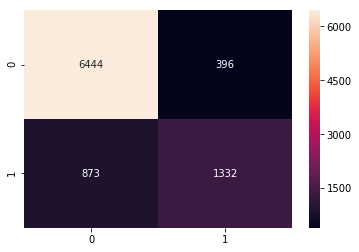

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

pred = best_clf.predict(X_test)
sns.heatmap(confusion_matrix(y_test, pred), annot = True, fmt = '')

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |            0.8400       |     0.8617            |
| F-score        |              0.6767     |   0.7321       |


**Answer:**
F-scores and Accuracy are both better in the optimized model than in unoptimized one

## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.







### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**
- **WorkClass**: Because it will determine what kind of work will give income >=50, for example does the private have higher income for those people who work in or Self-emp-not-inc people ?
- **Hours/weak**: I believe that it is most important factor in determing the probability if a person can donate or not because not all people could work high hours rate in although we can find people who work less but gain more money so intergating this factor with other features will give us more knowledge over the data.
- **Occupation**: Of course, not all jobs have the same salary such that we need to know which kind of occupation the people work in could make them donate; After that, we can work on that factor and increase the probability of donation by only focusing on these people.
- **Capital-loss**: If the country has bad economic in specific times, will the the people donate or not?
- **Capital-gain**: Same as capital loss but in othere direction.

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

[2.35016395e-01 9.35391603e-02 1.05611126e-01 3.67762808e-02
 1.09809260e-01 4.97904523e-03 6.17719939e-03 1.09871202e-02
 6.01332038e-03 8.86748161e-03 5.14415135e-03 5.98357831e-05
 1.02116160e-03 1.34665099e-03 7.57172001e-04 3.28139102e-04
 5.32900383e-04 1.27645642e-03 7.46102803e-04 2.29143573e-03
 2.74824215e-03 7.94216047e-03 1.78356947e-03 5.73373291e-03
 4.77964034e-03 1.04338966e-04 5.48303584e-03 4.72883749e-03
 7.99141727e-03 2.94996843e-04 9.94894044e-02 1.30857195e-03
 2.70407474e-02 1.62356514e-03 1.90556685e-03 5.97314516e-03
 5.48211636e-05 7.21994607e-03 1.51211480e-02 4.64280272e-03
 3.33542936e-03 3.76476512e-03 8.37623912e-03 3.50187382e-04
 1.37330679e-02 3.37121505e-03 6.87566326e-03 4.01796532e-03
 3.91342679e-03 1.35081395e-02 1.07520286e-02 1.49835336e-03
 1.45396801e-02 5.77380179e-03 7.17169767e-03 1.33801387e-03
 2.96622863e-03 4.33091916e-03 8.57241991e-04 6.14771975e-03
 7.62597014e-03 1.55284939e-02 2.60004734e-04 1.41276007e-03
 6.68567052e-04 2.016272

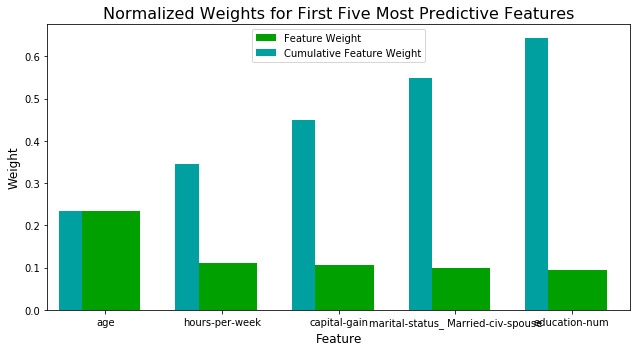

In [57]:
# TODO: Extract the feature importances using .feature_importances_ 
importances = clf.feature_importances_

print(importances)
# Plot
vs.feature_plot(importances, X_train, y_train)



### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

- In Q6, I predicted Hours per Week > Workclass > Occupation > Capital-gain > Capital-loss

- I correctly predicted Hours per week, Capital loss and Capital gain to be features in the top 5 in the visualization.

- For Workclass and Occupation, I think, that since, the Random Forest Classifier uses Decision Trees, it was able to better use Work class and occupation to get more info about the status of the donor and how avaliablity he/she could.

- After getting the importantances, i reliezed that Random Forest Classifier uses Decision Tree so it better use education-num instead of occupation since education-num was a number to get better purity and therefore it features.


- Also, Age is also another metric that I did not think of it earlier but thinking again, it seems that Age is good metric to get the range of people's age who could donates.

### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [58]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8597
F-score on testing data: 0.7305

Final Model trained on reduced data
------
Accuracy on testing data: 0.8452
F-score on testing data: 0.6924


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**
The final model trained on reduced data reduced the accuracy and the f-score.

If the training time were a factor then reducing the dataset can be considered since the reduction is not very significant. Although, for CharityML accuracy matters so we should consider that as well before taking the decision.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.